## ROC AUC for MultiClass Target Labels Datasets

In [9]:
# import libraries

import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# from sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# for metrics
from sklearn.metrics import roc_auc_score, roc_curve

# from yellowbricks
from yellowbrick.classifier import ROCAUC

In [3]:
# load data
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# prepare data
df = pd.concat([
    pd.DataFrame(data.data, columns= data.feature_names),
    pd.DataFrame(data.target, columns=['target'])
], axis = 1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# check info and balance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.target.value_counts()/len(df)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

In [8]:
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1),
                                                   df['target'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

## Train Models

In [36]:
# Random Forest
rf = OneVsRestClassifier(
        RandomForestClassifier(n_estimators=10, max_depth=1, n_jobs=2, random_state=39)
)

rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=1,
                                                     n_estimators=10, n_jobs=2,
                                                     random_state=39))

In [37]:
# get the probability predictions

rf_probs = rf.predict_proba(X_test)
rf_probs[:10, :]

array([[0.65585892, 0.30751478, 0.0366263 ],
       [0.05518233, 0.25215179, 0.69266589],
       [0.34795739, 0.5812701 , 0.07077251],
       [0.63193034, 0.32889668, 0.03917297],
       [0.30310868, 0.49998879, 0.19690253],
       [0.37648223, 0.53413382, 0.08938395],
       [0.59288054, 0.31292709, 0.09419236],
       [0.05019807, 0.22826575, 0.72153618],
       [0.18841092, 0.71865205, 0.09293703],
       [0.13170475, 0.67533883, 0.19295642]])

In [38]:
# sum of these probabilities across the each vector is always 1
rf_probs.sum(axis = 1)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
# Logistic Model
log = LogisticRegression(max_iter=10, multi_class='ovr', random_state=0)

log.fit(X_train, y_train)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(max_iter=10, multi_class='ovr', random_state=0)

In [51]:
log_probs = log.predict_proba(X_test)
log_probs[:10,:]

array([[8.03835946e-01, 6.55703628e-02, 1.30593691e-01],
       [1.12186161e-04, 6.18682106e-01, 3.81205708e-01],
       [1.89065726e-03, 5.97109910e-01, 4.00999433e-01],
       [8.38327387e-01, 4.50373337e-02, 1.16635279e-01],
       [5.29907169e-04, 6.02840121e-01, 3.96629972e-01],
       [1.44386555e-05, 6.27677859e-01, 3.72307703e-01],
       [8.98500309e-01, 1.82105291e-02, 8.32891616e-02],
       [8.63968121e-03, 5.62918752e-01, 4.28441566e-01],
       [3.51523966e-02, 5.31592415e-01, 4.33255189e-01],
       [1.77044639e-02, 5.57176456e-01, 4.25119080e-01]])

## ROC curve SKLEARN for each class

- To do this, we will need to label binarize our target classes

In [19]:
y_test = label_binarize(y_test, classes=[0,1,2])

In [20]:
y_test[:10,:]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

## Get the ROC parameter values

In [39]:
# lets get for class 0 first for Random Forest
fpr, tpr, threshold = roc_curve(y_test[:,0], rf_probs[:,0])

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02857143, 0.02857143, 1.        ])

In [40]:
tpr

array([0.        , 0.05263158, 0.15789474, 0.21052632, 0.31578947,
       0.94736842, 0.94736842, 1.        , 1.        ])

In [41]:
threshold

array([1.67049232, 0.67049232, 0.65585892, 0.65216469, 0.63193034,
       0.44236274, 0.42327198, 0.41642178, 0.03969788])

In [42]:
# lets get for class 0 first for Logistic Regression
fpr, tpr, threshold = roc_curve(y_test[:,0], log_probs[:,0])

fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.08571429, 0.08571429, 1.        ])

In [43]:
tpr

array([0.        , 0.05263158, 0.89473684, 0.89473684, 0.94736842,
       0.94736842, 1.        , 1.        ])

In [44]:
threshold

array([1.99827338e+00, 9.98273381e-01, 9.44300828e-01, 5.40805116e-01,
       5.08933299e-01, 3.22452786e-01, 1.87074060e-01, 5.62508033e-05])

In [45]:
# lets get these roc parameter values for all classes into a dictionary

rf_fpr = dict()
rf_tpr = dict()

for i in range(3):
    
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test[:,i], rf_probs[:,i])

In [46]:
rf_fpr

{0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02857143, 0.02857143, 1.        ]),
 1: array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
        0.375  , 0.4375 , 0.5625 , 0.625  , 0.625  , 1.     ]),
 2: array([0.        , 0.        , 0.        , 0.02439024, 0.02439024,
        0.75609756, 0.80487805, 0.87804878, 0.92682927, 1.        ])}

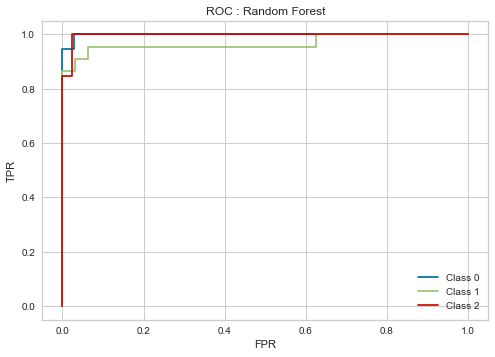

In [58]:
# plot these roc values

for i in range(3):
    plt.plot(rf_fpr[i], rf_tpr[i], label='Class {}'.format(i))
    
plt.title('ROC : Random Forest')
plt.legend(loc='best')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [52]:
# lets get these roc parameter values for all classes into a dictionary for Logistic model

log_fpr = dict()
log_tpr = dict()

for i in range(3):
    
    log_fpr[i], log_tpr[i], _ = roc_curve(y_test[:,i], log_probs[:,i])

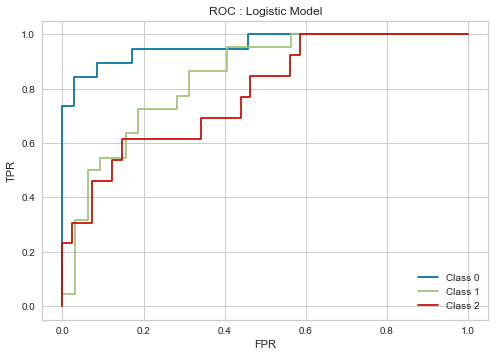

In [57]:
# plot these roc values for Logistic model

for i in range(3):
    plt.plot(log_fpr[i], log_tpr[i], label='Class {}'.format(i))
    
plt.title('ROC : Logistic Model')
plt.legend(loc='best')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

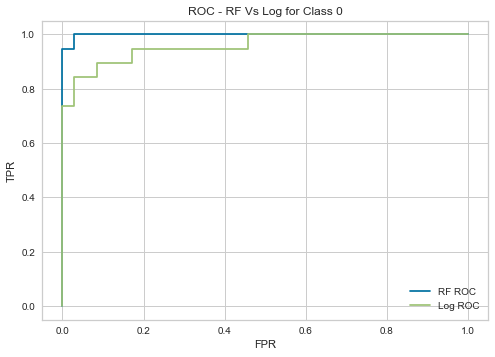

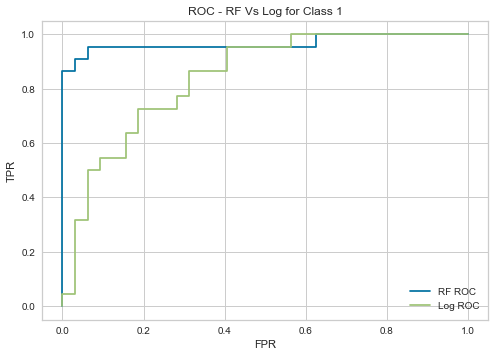

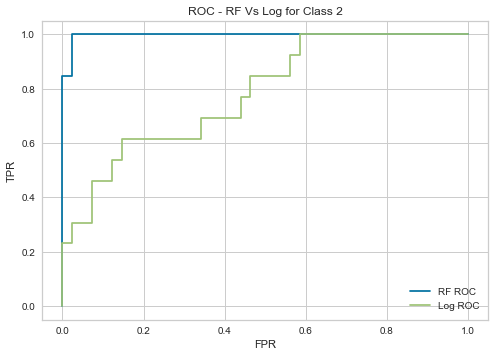

In [56]:
# lets plot and compare for each class between the two models

for i in range(3):
    fpr_rf, tpr_rf, _ = roc_curve(y_test[:,i], rf_probs[:,i])
    fpr_log, tpr_log, _ = roc_curve(y_test[:,i], log_probs[:,i])
    
    plt.plot(fpr_rf, tpr_rf, label = 'RF ROC')
    plt.plot(fpr_log, tpr_log, label = 'Log ROC')
    plt.title('ROC - RF Vs Log for Class {}'.format(i))
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    

- We can see the RF does a better performance than the Log for all classes

## Micro Average

- To find the micro average, we will need to stack up probabilities of all the classes, which can be done using ravel function
- Micro average is to find the metrics for the overall model in terms of all classes and not specific to a single class

In [60]:
rf_probs.ravel()

array([0.65585892, 0.30751478, 0.0366263 , 0.05518233, 0.25215179,
       0.69266589, 0.34795739, 0.5812701 , 0.07077251, 0.63193034,
       0.32889668, 0.03917297, 0.30310868, 0.49998879, 0.19690253,
       0.37648223, 0.53413382, 0.08938395, 0.59288054, 0.31292709,
       0.09419236, 0.05019807, 0.22826575, 0.72153618, 0.18841092,
       0.71865205, 0.09293703, 0.13170475, 0.67533883, 0.19295642,
       0.14215091, 0.29068131, 0.56716779, 0.03969788, 0.32611392,
       0.6341882 , 0.67049232, 0.29443878, 0.03506889, 0.42327198,
       0.50031035, 0.07641767, 0.0591323 , 0.26832053, 0.67254717,
       0.15374694, 0.77041466, 0.07583841, 0.58034038, 0.38076094,
       0.03889868, 0.62403154, 0.34111956, 0.0348489 , 0.1354814 ,
       0.42117747, 0.44334113, 0.65216469, 0.31081584, 0.03701947,
       0.40973074, 0.52592483, 0.06434443, 0.55023138, 0.40190058,
       0.04786804, 0.44236274, 0.45261204, 0.10502522, 0.13095529,
       0.7700388 , 0.09900591, 0.14384689, 0.30677854, 0.54937

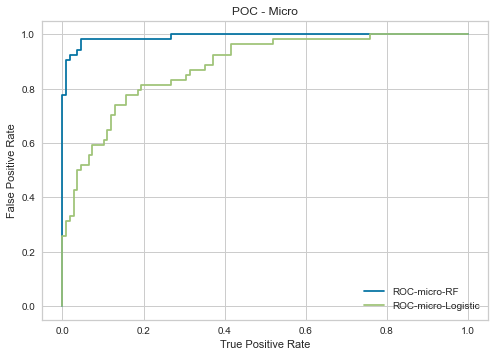

In [65]:
 # lets plot and compare between the two models
    
fpr_rf_micro, tpr_rf_micro, _ = roc_curve(y_test.ravel(), rf_probs.ravel())
fpr_log_micro, tpr_log_micro, _ = roc_curve(y_test.ravel(), log_probs.ravel())

# plot with these values
plt.plot(fpr_rf_micro, tpr_rf_micro, label = 'ROC-micro-RF')
plt.plot(fpr_log_micro, tpr_log_micro, label = 'ROC-micro-Logistic')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.title('POC - Micro')
plt.show()

## ROC AUC score - with sklearn

In [69]:
macro_roc_auc_ovo_rf = roc_auc_score(y_test, rf_probs, average='macro', multi_class='ovo', labels=[0,1,2])

micro_roc_auc_ovo_rf = roc_auc_score(y_test, rf_probs, average='weighted', multi_class='ovo', labels=[0,1,2])

macro_roc_auc_ovr_rf = roc_auc_score(y_test, rf_probs, average='macro', multi_class='ovr', labels=[0,1,2])

micro_roc_auc_ovr_rf = roc_auc_score(y_test, rf_probs, average='weighted', multi_class='ovr', labels=[0,1,2])

print("Macro and Weighted roc_auc for RF for 'ovo': {:.6f} and {:.6f}".format(macro_roc_auc_ovo_rf, micro_roc_auc_ovo_rf))
print("Macro and Weighted roc_auc for RF for 'ovr': {:.6f} and {:.6f}".format(macro_roc_auc_ovr_rf, micro_roc_auc_ovr_rf))

Macro and Weighted roc_auc for RF for 'ovo': 0.987358 and 0.985257
Macro and Weighted roc_auc for RF for 'ovr': 0.987358 and 0.985257


In [71]:
macro_roc_auc_ovo_log = roc_auc_score(y_test, log_probs, average='macro', multi_class='ovo', labels=[0,1,2])

micro_roc_auc_ovo_log = roc_auc_score(y_test, log_probs, average='weighted', multi_class='ovo', labels=[0,1,2])

macro_roc_auc_ovr_log = roc_auc_score(y_test, log_probs, average='macro', multi_class='ovr', labels=[0,1,2])

micro_roc_auc_ovr_log = roc_auc_score(y_test, log_probs, average='weighted', multi_class='ovr', labels=[0,1,2])

print("Macro and Weighted roc_auc for Logistic for 'ovo': {:.6f} and {:.6f}".format(macro_roc_auc_ovo_log, micro_roc_auc_ovo_log))
print("Macro and Weighted roc_auc for Logistic for 'ovr': {:.6f} and {:.6f}".format(macro_roc_auc_ovr_log, micro_roc_auc_ovr_log))

Macro and Weighted roc_auc for Logistic for 'ovo': 0.860891 and 0.868506
Macro and Weighted roc_auc for Logistic for 'ovr': 0.860891 and 0.868506


# ROC and ROC-AUC with YellowBrick

In [74]:
# we will need to re-format our y_test vector that we have binary labelized
y_test[:10,:]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [76]:
y_test = np.argmax(y_test, axis=1)
y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


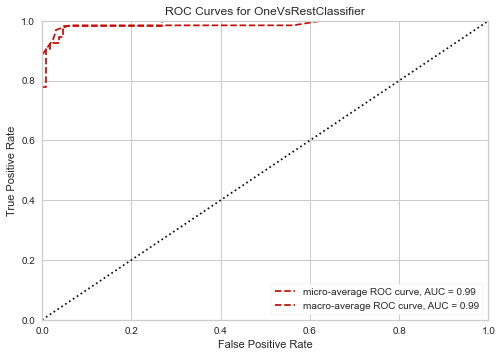

<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
# for Random Forest Micro
viz_rf = ROCAUC(rf, micro=True, per_class=False)

viz_rf.fit(X_train, y_train)
viz_rf.score(X_test, y_test)
viz_rf.show()

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


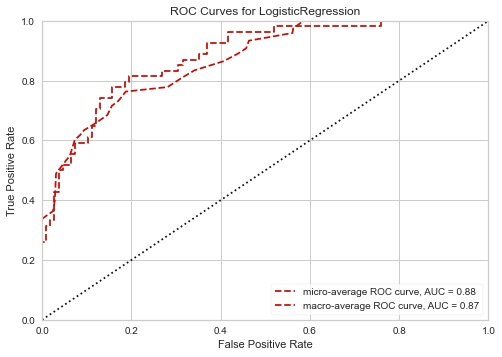

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [78]:
# for Logistic Model Micro
viz_log = ROCAUC(log, micro=True, per_class=False)

viz_log.fit(X_train, y_train)
viz_log.score(X_test, y_test)
viz_log.show()

## Per Class

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


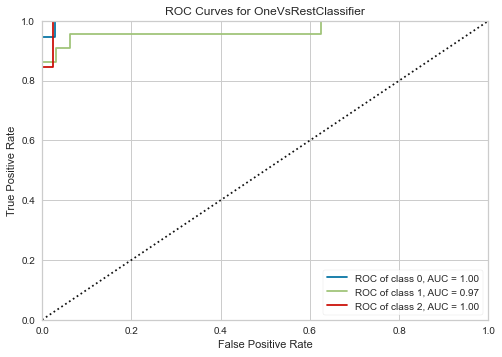

<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [81]:
# for random forest per class
viz_rf_ = ROCAUC(rf, per_class=True, macro=False, micro=False)

viz_rf_.fit(X_train, y_train)
viz_rf_.score(X_test, y_test)
viz_rf_.show()

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


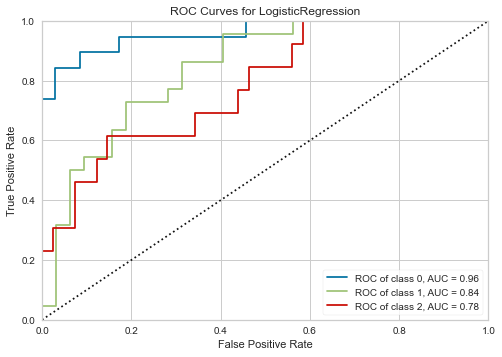

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [82]:
# for logistic model per class
viz_log_ = ROCAUC(log, per_class=True, macro=False, micro=False)

viz_log_.fit(X_train, y_train)
viz_log_.score(X_test, y_test)
viz_log_.show()